In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
def getAndParseURL(url):
    result=requests.get(url,headers={"User-Agent":"Chrome/110.0.5481.178"})
    soup=bts(result.text,"html.parser")
    return soup

In [93]:
pages=["https://www.funda.nl/en/huur/amsterdam/"]
for page in range(2,88):
    pages.append("https://www.funda.nl/en/huur/amsterdam/p" +str (page))
    
pages

['https://www.funda.nl/en/huur/amsterdam/',
 'https://www.funda.nl/en/huur/amsterdam/p2',
 'https://www.funda.nl/en/huur/amsterdam/p3',
 'https://www.funda.nl/en/huur/amsterdam/p4',
 'https://www.funda.nl/en/huur/amsterdam/p5',
 'https://www.funda.nl/en/huur/amsterdam/p6',
 'https://www.funda.nl/en/huur/amsterdam/p7',
 'https://www.funda.nl/en/huur/amsterdam/p8',
 'https://www.funda.nl/en/huur/amsterdam/p9',
 'https://www.funda.nl/en/huur/amsterdam/p10',
 'https://www.funda.nl/en/huur/amsterdam/p11',
 'https://www.funda.nl/en/huur/amsterdam/p12',
 'https://www.funda.nl/en/huur/amsterdam/p13',
 'https://www.funda.nl/en/huur/amsterdam/p14',
 'https://www.funda.nl/en/huur/amsterdam/p15',
 'https://www.funda.nl/en/huur/amsterdam/p16',
 'https://www.funda.nl/en/huur/amsterdam/p17',
 'https://www.funda.nl/en/huur/amsterdam/p18',
 'https://www.funda.nl/en/huur/amsterdam/p19',
 'https://www.funda.nl/en/huur/amsterdam/p20',
 'https://www.funda.nl/en/huur/amsterdam/p21',
 'https://www.funda.nl/e

In [7]:
ex=getAndParseURL("https://www.funda.nl/en/huur/amsterdam/p3/")

In [25]:
ex.find("div",{"class":"search-result__header-title-col"}).a.get("href")

'/en/huur/amsterdam/appartement-42901463-osdorpplein-905/'

In [4]:
links = []
for page in pages:
    html = getAndParseURL(page)
    for resulthf in html.findAll("div",{"class":"search-result__header-title-col"}):
        links.append("https://www.funda.nl/" + resulthf.a.get("href"))

links

['https://www.funda.nl//en/huur/amsterdam/huis-42021083-wyandottestraat-9/',
 'https://www.funda.nl//en/huur/amsterdam/appartement-42942913-prinsengracht-158-1/',
 'https://www.funda.nl//en/huur/amsterdam/appartement-42022012-hendrik-jacobszstraat-24-h/',
 'https://www.funda.nl//en/huur/amsterdam/appartement-88455790-gustav-mahlerlaan-240/',
 'https://www.funda.nl//en/huur/amsterdam/appartement-42000671-groenmarktkade-16/',
 'https://www.funda.nl//en/huur/amsterdam/appartement-88455843-pieter-cornelisz-hooftstraat-144-h/',
 'https://www.funda.nl//en/huur/amsterdam/appartement-42069146-prinsengracht-421-d/',
 'https://www.funda.nl//en/huur/amsterdam/huis-42002485-leidsegracht-58/',
 'https://www.funda.nl//en/huur/amsterdam/appartement-42021061-oostenburgergracht-55-d/',
 'https://www.funda.nl//en/huur/amsterdam/appartement-42957649-sarphatistraat-14-n/',
 'https://www.funda.nl//en/huur/amsterdam/appartement-42067967-dam-5-l/',
 'https://www.funda.nl//en/huur/amsterdam/appartement-420207

In [5]:
len(links)

1273

In [6]:
ex=getAndParseURL("https://www.funda.nl//en/huur/amsterdam/appartement-42024043-van-tuyll-van-serooskerkenweg-74-ii")

In [11]:
### Rent Price ###
ex.find("strong",{"class":"object-header__price"}).text.replace("€ ","").replace(" p/mo.","").replace(",","").strip()

'2150'

In [14]:
### NET AREA OF FLAT  ###
ex.find("span",{"class":"kenmerken-highlighted__value fd-text--nowrap"}).text.replace(" m²","").strip()

'80'

In [68]:
### BATHROOM NUMBER ###
ex.find("div",{"class":"object-kenmerken-body"}).text.split("Number of bath rooms")[1].split("\n")[2].replace(" bathroom","").strip()

'1'

In [77]:
### Number OF ROOMS ###
ex.find("div",{"class":"object-kenmerken-body"}).text.split("Number of rooms")[1].split("\n")[2][0:7].replace(" rooms","").strip()

'3'

In [33]:
### DEPOSIT ###
ex.find("dd",{"class":"object-kenmerken-group-list"}).find(text=re.compile("Deposit")).findNext().text[0:7].replace("€ ","").replace(",","").strip()

'4300'

In [79]:
### LOCATION ###
ex.find("span",{"class":"object-header__subtitle fd-color-dark-3"}).text.strip()

'1076 JN Amsterdam'

In [80]:
result = []
for resulthf in links:
    html = getAndParseURL(resulthf)
    
    try:
        location = html.find("span",{"class":"object-header__subtitle fd-color-dark-3"}).text.strip()
    except:
        location = np.nan
    try:
        rent= html.find("strong",{"class":"object-header__price"}).text.replace("€ ","").replace(" p/mo.","").replace(",","").strip()
    except:
        rent = np.nan
    try:
        deposit = html.find("dd",{"class":"object-kenmerken-group-list"}).find(text=re.compile("Deposit")).findNext().text[0:7].replace("€ ","").replace(",","").strip()
    except:
        deposit = np.nan
    try:
        rooms = html.find("div",{"class":"object-kenmerken-body"}).text.split("Number of rooms")[1].split("\n")[2][0:7].replace(" rooms","").strip()
    except:
        rooms = np.nan
    try:
        bathroom = html.find("div",{"class":"object-kenmerken-body"}).text.split("Number of bath rooms")[1].split("\n")[2].replace(" bathroom","").strip()
    except:
        bathroom = np.nan
    try:
        net_area = html.find("span",{"class":"kenmerken-highlighted__value fd-text--nowrap"}).text.replace(" m²","").strip()
    except:
        net_area = np.nan
    time.sleep(2)
    
    result.append([location,rent,deposit,rooms,bathroom,net_area])
    
columns=["Location","Rent","Deposit","Rooms","Bathroom","Net Area"]
df = pd.DataFrame.from_records(result, columns=columns)

In [81]:
df

,Location,Rent,Deposit,Rooms,Bathroom,Net Area
0,1109 BS Amsterdam,3000,6000,5,1 and 1 separate toilet,158
1,1016 HA Amsterdam\r\n Jordaan,3250,6500,4,2s and 1 separate toilet,136
2,1075 PE Amsterdam,3600,7200,6,1 and 1 separate toilet,142
3,1082 ME Amsterdam,4500,8000,4,2s and 1 separate toilet,114
4,1016 TA Amsterdam,3750,7500,3,2s and 1 separate toilet,125
...,...,...,...,...,...,...
1268,1074 XT Amsterdam,2750,5500,3,NaN,NaN
1269,1032 LS Amsterdam,2250,2250,1 room,NaN,NaN
1270,1015 DE Amsterdam,3400,None,3,NaN,NaN
1271,1091 VV Amsterdam,1850,3700,2,NaN,NaN


In [82]:
df.tail()

,Location,Rent,Deposit,Rooms,Bathroom,Net Area
1268,1074 XT Amsterdam,2750,5500,3,NaN,NaN
1269,1032 LS Amsterdam,2250,2250,1 room,NaN,NaN
1270,1015 DE Amsterdam,3400,None,3,NaN,NaN
1271,1091 VV Amsterdam,1850,3700,2,NaN,NaN
1272,1072 JN Amsterdam,2250,4500,3,NaN,NaN


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  801 non-null    object
 1   Rent      786 non-null    object
 2   Deposit   783 non-null    object
 3   Rooms     711 non-null    object
 4   Bathroom  532 non-null    object
 5   Net Area  671 non-null    object
dtypes: object(6)
memory usage: 59.8+ KB


In [3]:
df["Rent"]=df["Rent"].astype(float)

In [12]:
df["Rent"].mean()

2768.012640449438

In [5]:
df["Rent"].max()

14000.0

In [9]:
df= df.loc[(df["Rent"] >= 800) & (df["Rent"] <= 15000),:]

In [10]:
df["Rent"].unique()

array([ 3000.,  3250.,  3600.,  4500.,  3750., 10000.,  3150.,  5500.,
        1600.,  2750.,  8500.,  2950., 12000.,  2400.,  1725.,  1620.,
        3415.,  6000.,  1750.,  2550.,  1525.,  2500.,  2395.,  2525.,
        3075.,  3300.,  1805.,  1570.,  1780.,   827.,  5000.,  2250.,
        4000.,  3500.,  3900.,  8800.,  2050.,  1550.,  1875.,  1800.,
        2100.,  1850.,  1700.,  2450.,  2495.,  1975.,  6500.,  3450.,
        4450.,  2720.,  2000.,  2275., 13500.,  2200.,  2900.,  2600.,
        2850.,  8000.,  1740.,  1680.,  2150.,  7300.,  7750.,  2390.,
        3995.,  1535.,  1870.,  1615.,  2460.,  1685.,  7500.,  7000.,
        2315.,  1950.,  3225.,  1900.,  2790.,  1925.,  1575.,  1650.,
        1775.,  3800.,  2800.,  1625.,  2650.,  5750.,  2350.,  1487.,
        2300.,  1460.,  1360.,  5650.,  4250.,  5300.,  3950.,  3650.,
        1500.,  4850., 14000.,  1250.,  3400.,  4210.,  3005.,  4600.,
        2700.,  1988.,  4300.,  1816.,  2995.,  5250.,  3700.,  4775.,
      

In [11]:
df["Rent"].min()

800.0

In [91]:
df.to_csv("amsterdam_market.csv")

In [2]:
df=pd.read_csv("amsterdam_market.csv")

In [13]:
df["Deposit"].unique()

array(['6000', '6500', '7200', '8000', '7500', '1250', '6300', '1200',
       '3200', '5900', '1700', '2400', '4800', '3450', '3240', '6830',
       '3500', '5100', '3050', '5000', '4790', '5050', '6150', '6600',
       'None', '1445', '1000', '4500', '1100', '7000', '7800', '1760',
       '5500', '2000', '2050', '3100', '3750', '3600', '4200', '3700',
       '4150', '3400', '1500', '4900', '4990', '6400', '3000', '1300',
       '6900', '8900', '4400', '4000', '4550', '4140', '2700', '1050',
       '5800', '5200', '5700', '1600', '3480', '3360', '1460', '1550',
       '7600', '3070', '3740', '3230', '4920', '3370', '6200', '2100',
       '9000', '5530', '4720', '7550', '4290', '6290', '4340', '3630',
       '4410', '3560', '3550', '1400', '4300', '5600', '3300', '7990',
       '3250', '5300', '1150', '4700', '4600', '7300', '2250', '1130',
       '8500', '1800', '1060', '7900', '1765', '5400', '1455', '4530',
       '9900', '1950', '3900', '6800', '9200', '9700', '3976', '8600',
      

In [15]:
df['Deposit'] = df['Deposit'].apply(lambda x: 3000 if x == 'None' else x)

In [18]:
df["Deposit"]=df["Deposit"].fillna(3000)

In [19]:
df["Deposit"]=df["Deposit"].astype(int)

In [20]:
df["Deposit"].mean()

4376.817415730337

In [23]:
df["Rooms"].unique()

array(['5', '4', '6', '3', '2', '8', 1, '9', 10, '7'], dtype=object)

In [22]:
df['Rooms'] = df['Rooms'].apply(lambda x: 1 if x == '1 room' else x)
df['Rooms'] = df['Rooms'].apply(lambda x: 10 if x == '10 room' else x)
df["Rooms"]=df["Rooms"].fillna(1)

In [28]:
df["Bathroom"].unique()

array([1, 2, 3], dtype=int64)

In [25]:
def replace_bathroom_value(value):
    if pd.isna(value):
        return 0
    elif '1' in value:
        return 1
    elif '2' in value:
        return 2
    elif '3' in value:
        return 3
    else:
        return 0
    
df['Bathroom'] = df['Bathroom'].apply(replace_bathroom_value)

In [27]:
df['Bathroom'] = df['Bathroom'].apply(lambda x: 1 if x == 0 else x)

In [29]:
df["Net Area"].unique()

array([158., 136., 142., 114., 125., 152., 135., 201.,  60.,  93., 117.,
       115., 569.,  84.,  73.,  64., 130.,  65., 112.,  63., 110., 207.,
        59.,  29., 197.,  81., 232.,  87., 313., 134., 138.,  89.,  91.,
       137., 224., 129., 220., 143.,  82.,  30.,  40.,  33., 100.,  57.,
        50.,  85.,  53.,  72., 120.,  70., 105., 196., 101.,  76., 106.,
        55., 144.,  95.,  90.,  86.,  37., 119., 360., 103., 160.,  51.,
        69., 116.,  75., 102., 277., 122., 270.,  66.,  52., 170., 155.,
        68., 190., 163., 188.,  77.,  62., 107.,  74., 195., 233., 176.,
        92., 108.,  61.,  71., 171.,  48., 240., 131., 151.,  97.,  78.,
       140., 149., 157., 200., 128., 177., 150.,  94.,  58., 204., 342.,
        80.,  46., 222., 164.,  99., 181., 161., 165.,  42., 118., 178.,
       111., 141., 187., 242., 121., 221., 162.,  96.,  88., 182., 145.,
       139., 127.,  49., 180., 175., 189.,  83.,  56.,  35., 280.,  43.,
       185.,  79., 132.,  23., 104., 168.,  41., 16

In [32]:
df["Net Area"].mean()

102.13981762917933

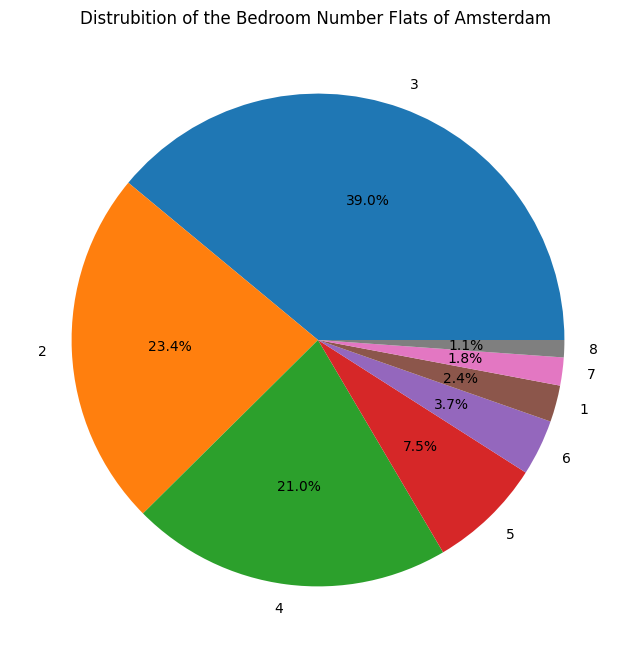

In [33]:
# get the value counts of the 'Bedroom' column
bed_room_counts = df['Rooms'].value_counts()

# filter the value counts to include only values bigger than 1%
filtered_bedroom_counts = bed_room_counts[bed_room_counts/len(df) > 0.01]


# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_bedroom_counts, labels=filtered_bedroom_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Distrubition of the Bedroom Number Flats of Amsterdam ')

# display the chart
plt.show();


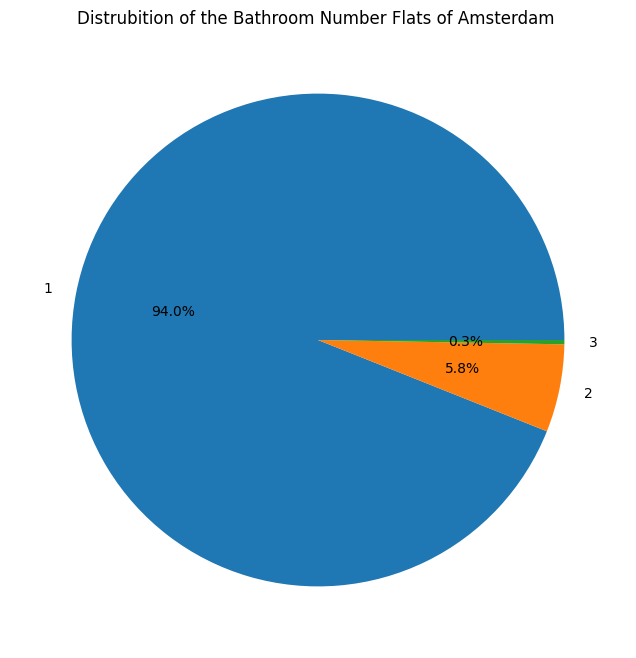

In [35]:
# get the value counts of the 'Bathroom' column
room_counts = df['Bathroom'].value_counts()


# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Distrubition of the Bathroom Number Flats of Amsterdam ')

# display the chart
plt.show();


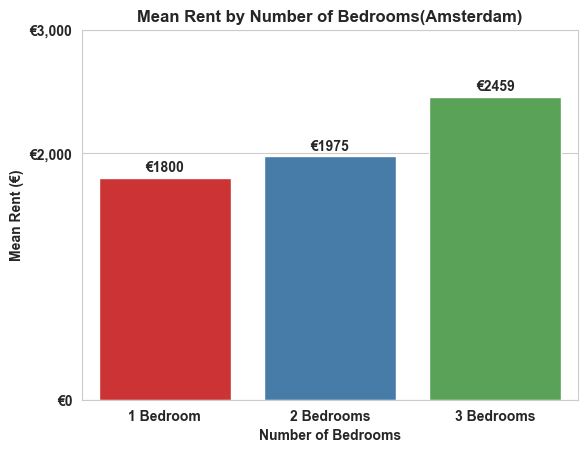

In [78]:
# Calculate mean rent for each group 
one_bed_mean_rent = df[df['Rooms'] == 1]['Rent'].mean()
two_bed_mean_rent = df[df['Rooms'] == 2]['Rent'].mean()
three_bed_mean_rent = df[df['Rooms'] == 3]['Rent'].mean()

# Create a bar plot
sns.set_style("whitegrid")
ax = sns.barplot(x=['1 Bedroom', '2 Bedrooms','3 Bedrooms'], y=[one_bed_mean_rent, two_bed_mean_rent,three_bed_mean_rent], palette="Set1")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+50, '€{:.0f}'.format(height), ha="center", weight='bold')

# Format the x and y-axis tick labels
ax.set_xticklabels(['1 Bedroom', '2 Bedrooms','3 Bedrooms'], weight='bold')
ax.set_yticks([0, 2000, 3000])
ax.set_yticklabels(['€0', '€2,000', '€3,000'], weight='bold')

# Format the x and y-axis labels
ax.set_xlabel('Number of Bedrooms', weight='bold')
ax.set_ylabel('Mean Rent (€)', weight='bold')

# Set the plot title
ax.set_title('Mean Rent by Number of Bedrooms(Amsterdam)', weight='bold')

plt.show();

In [74]:
two_bed_mean_rent = df[df['Rooms'] == 2]

In [73]:
df["Rooms"]=df["Rooms"].astype(int)

In [75]:
two_bed_mean_rent

,Unnamed: 0,Location,Rent,Deposit,Rooms,Bathroom,Net Area
8,8,1018 NB Amsterdam,1600.0,3200,2,1,60.0
9,9,1017 WS Amsterdam,2750.0,5900,2,1,93.0
14,14,1033 DB Amsterdam,1725.0,3450,2,1,73.0
15,15,1033 DB Amsterdam,1620.0,3240,2,1,64.0
18,18,1033 DB Amsterdam,1750.0,3500,2,1,65.0
...,...,...,...,...,...,...,...
1263,1263,1015 BS Amsterdam,1900.0,3800,2,1,NaN
1264,1264,1057 CX Amsterdam,1800.0,3600,2,1,NaN
1265,1265,1016 PA Amsterdam,1585.0,3170,2,1,NaN
1266,1266,1017 AA Amsterdam,2350.0,4700,2,1,NaN


In [59]:
df["Rooms"].value_counts()

3     276
2     166
4     149
5      53
6      26
1      17
7      13
8       8
9       2
10      2
Name: Rooms, dtype: int64

In [58]:
df["Rooms"].unique()

array(['5', '4', '6', '3', '2', '8', 1, '9', 10, '7'], dtype=object)

In [53]:
df["Rent"].unique()

array([ 3000.,  3250.,  3600.,  4500.,  3750., 10000.,  3150.,  5500.,
        1600.,  2750.,  8500.,  2950., 12000.,  2400.,  1725.,  1620.,
        3415.,  6000.,  1750.,  2550.,  1525.,  2500.,  2395.,  2525.,
        3075.,  3300.,  1805.,  1570.,  1780.,   827.,  5000.,  2250.,
        4000.,  3500.,  3900.,  8800.,  2050.,  1550.,  1875.,  1800.,
        2100.,  1850.,  1700.,  2450.,  2495.,  1975.,  6500.,  3450.,
        4450.,  2720.,  2000.,  2275., 13500.,  2200.,  2900.,  2600.,
        2850.,  8000.,  1740.,  1680.,  2150.,  7300.,  7750.,  2390.,
        3995.,  1535.,  1870.,  1615.,  2460.,  1685.,  7500.,  7000.,
        2315.,  1950.,  3225.,  1900.,  2790.,  1925.,  1575.,  1650.,
        1775.,  3800.,  2800.,  1625.,  2650.,  5750.,  2350.,  1487.,
        2300.,  1460.,  1360.,  5650.,  4250.,  5300.,  3950.,  3650.,
        1500.,  4850., 14000.,  1250.,  3400.,  4210.,  3005.,  4600.,
        2700.,  1988.,  4300.,  1816.,  2995.,  5250.,  3700.,  4775.,
      

In [60]:
df

,Unnamed: 0,Location,Rent,Deposit,Rooms,Bathroom,Net Area
0,0,1109 BS Amsterdam,3000.0,6000,5,1,158.0
1,1,1016 HA Amsterdam\r\n Jordaan,3250.0,6500,4,1,136.0
2,2,1075 PE Amsterdam,3600.0,7200,6,1,142.0
3,3,1082 ME Amsterdam,4500.0,8000,4,1,114.0
4,4,1016 TA Amsterdam,3750.0,7500,3,1,125.0
...,...,...,...,...,...,...,...
1268,1268,1074 XT Amsterdam,2750.0,5500,3,1,NaN
1269,1269,1032 LS Amsterdam,2250.0,2250,1,1,NaN
1270,1270,1015 DE Amsterdam,3400.0,3000,3,1,NaN
1271,1271,1091 VV Amsterdam,1850.0,3700,2,1,NaN
